## Почему l1 регуляризация отбирает признаки

Функция ошибки соответственно состоит из ошибки mse и ошибки регуляризатора (l1 или l2 соответственно) и минимум этой функции находится в точке соприкосновения линий уровня этих 2-х составляющих. Линия уровня функции, соответственно значения весов при которых имеем одно и то же значение ошибки. Покажем это на языке python.

In [37]:
#загрузка необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#закгрузка датасета
data = datasets.load_boston()
X = data.data
X = X.T[0:2].T
y = data.target

# вычисление значения минимума весов по формуле линейной регрессии
coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(f'Коэффициенты минимизирующие функцию {coef}')

Коэффициенты минимизирующие функцию [0.57891441 0.49506501]


In [39]:
#функция вычисления состаляющей ошибке mse
def mse(w1, w2):
    return mean_squared_error(np.dot(X, np.array([w1, w2])).T,  y)

print(f' минимальное значение составляющей ошибки mse {mse(coef[0], coef[1])}')

 минимальное значение составляющей ошибки mse 397.79423501521836


Далее вычислим множество значений состаляющей функции ошибки mse и составляющих функции ошибки регуляризатора при различных значениях весов.

In [5]:
bias1 = np.random.normal(loc=0.0, scale=1.0, size=10000)
bias2 = np.random.normal(loc=0.0, scale=1.0, size=10000)
val_mse = []
coef_1 = []
coef_2 = []
val_l1 = []
val_l2 = []

for i in range(10000):
    val_mse.append(round(mse(coef[0] + bias1[i], coef[1]+ bias2[i])))
    coef_1.append(coef[0] + bias1[i])
    coef_2.append(coef[1] + bias2[i])
    val_l1.append((np.abs(coef[0] + bias1[i]) + np.abs(coef[1] + bias2[i])))
    val_l2.append(np.sqrt((coef[0] + bias1[i])**2 + (coef[1] + bias2[i])**2))
    
df = pd.DataFrame({'mse': val_mse, 'coef_1': coef_1, 'coef_2': coef_2, 'l1': val_l1, 'l2': val_l2})

Построим линии уровней составляющей функции ошибки **mse** на разных порогах значения mse (линии уровня будут иметь форму элипсов)

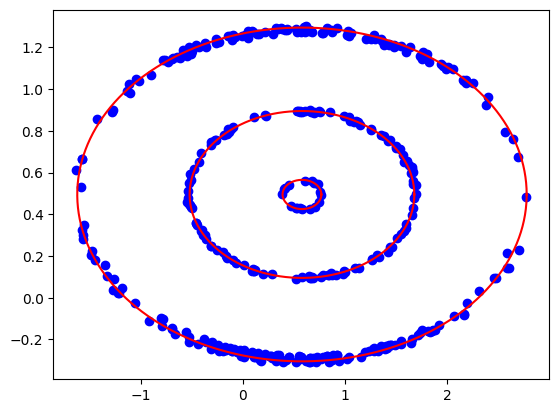

In [6]:
plt.scatter(x=df.query('mse > 400 and mse < 402')['coef_1'], y=df.query('mse > 400 and mse < 402')['coef_2'], c='blue')
plt.scatter(x=df.query('mse > 500 and mse < 510')['coef_1'], y=df.query('mse > 500 and mse < 510')['coef_2'], c='blue')
plt.scatter(x=df.query('mse > 800 and mse < 840')['coef_1'], y=df.query('mse > 800 and mse < 840')['coef_2'], c='blue')

t = np.linspace(0,360,360)
a =0.19*np.cos(np.radians(t)) +  coef[0]
b = 0.07*np.sin(np.radians(t)) + coef[1]
plt.plot(a,b, color='red')
a =1.1*np.cos(np.radians(t)) +  coef[0]
b = 0.4*np.sin(np.radians(t)) + coef[1]
plt.plot(a,b, color='red')
a =2.2*np.cos(np.radians(t)) +  coef[0]
b = 0.8*np.sin(np.radians(t)) + coef[1]
plt.plot(a,b, color='red')
plt.show()

Построим линии уровней составляющей функции ошибки **l1** регуляризатора на разных порогах значения l1 (линии уровня будут иметь форму ромбов)

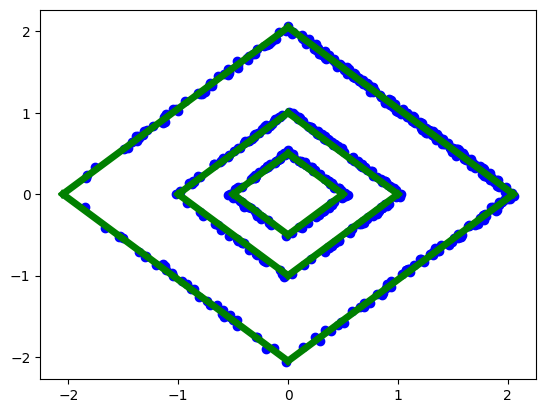

In [27]:
plt.scatter(x=df.query('l1 > 0.5 and l1 < 0.55')['coef_1'], y=df.query('l1 > 0.5 and l1 < 0.55')['coef_2'], c='blue')
plt.scatter(x=df.query('l1 > 1 and l1 < 1.05')['coef_1'], y=df.query('l1 > 1 and l1 < 1.05')['coef_2'], c='blue')
plt.scatter(x=df.query('l1 > 2 and l1 < 2.1')['coef_1'], y=df.query('l1 > 2 and l1 < 2.1')['coef_2'], c='blue')

plt.plot([-0.5, 0], [0, 0.5], 'green', linewidth=5)
plt.plot([0.5, 0], [0, 0.5], 'green', linewidth=5)
plt.plot([0.5, 0], [0, -0.5], 'green', linewidth=5)
plt.plot([-0.5, 0], [0, -0.5], 'green', linewidth=5)

plt.plot([-1.0, 0], [0, 1.0], 'green', linewidth=5)
plt.plot([1.0, 0], [0, 1.0], 'green', linewidth=5)
plt.plot([1.0, 0], [0, -1.0], 'green', linewidth=5)
plt.plot([-1.0, 0], [0, -1.0], 'green', linewidth=5)

plt.plot([-2.05, 0], [0, 2.05], 'green', linewidth=5)
plt.plot([2.05, 0], [0, 2.05], 'green', linewidth=5)
plt.plot([2.05, 0], [0, -2.05], 'green', linewidth=5)
plt.plot([-2.05, 0], [0, -2.05], 'green', linewidth=5)
plt.show()

Построим линии уровней составляющей функции ошибки **l2** регуляризатора на разных порогах значения l2 (линии уровня будут иметь форму кругов)

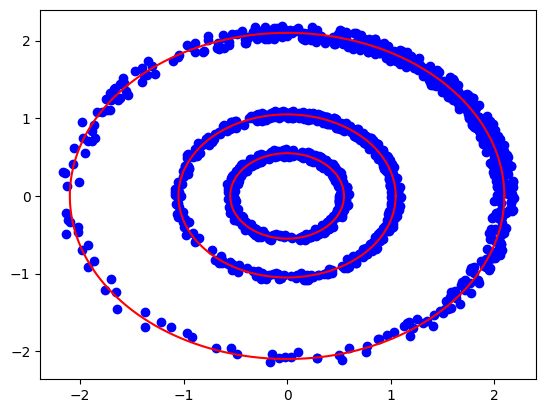

In [35]:
plt.scatter(x=df.query('l2 > 0.5 and l2 < 0.6')['coef_1'], y=df.query('l2 > 0.5 and l2 < 0.6')['coef_2'], c='blue')
plt.scatter(x=df.query('l2 > 1 and l2 < 1.1')['coef_1'], y=df.query('l2 > 1 and l2 < 1.1')['coef_2'], c='blue')
plt.scatter(x=df.query('l2 > 2 and l2 < 2.2')['coef_1'], y=df.query('l2 > 2 and l2 < 2.2')['coef_2'], c='blue')

a =0.55*np.cos(np.radians(t))
b = 0.55*np.sin(np.radians(t))
plt.plot(a,b, color='red')
a =1.05*np.cos(np.radians(t))
b = 1.05*np.sin(np.radians(t))
plt.plot(a,b, color='red')
a =2.1*np.cos(np.radians(t))
b = 2.1*np.sin(np.radians(t))
plt.plot(a,b, color='red')

plt.show()

Поскольку минимум этих двух функционалов находится в точке соприкосновения этих двух функционалов (ведь если есть точка пересечения мы можем двигаться вдоль одной из линий уровня уменьшая этот функционал не изменяя функционал 2-й функции и именно в точке касания будет минимум). Продемонстрируем этот эффект графически.

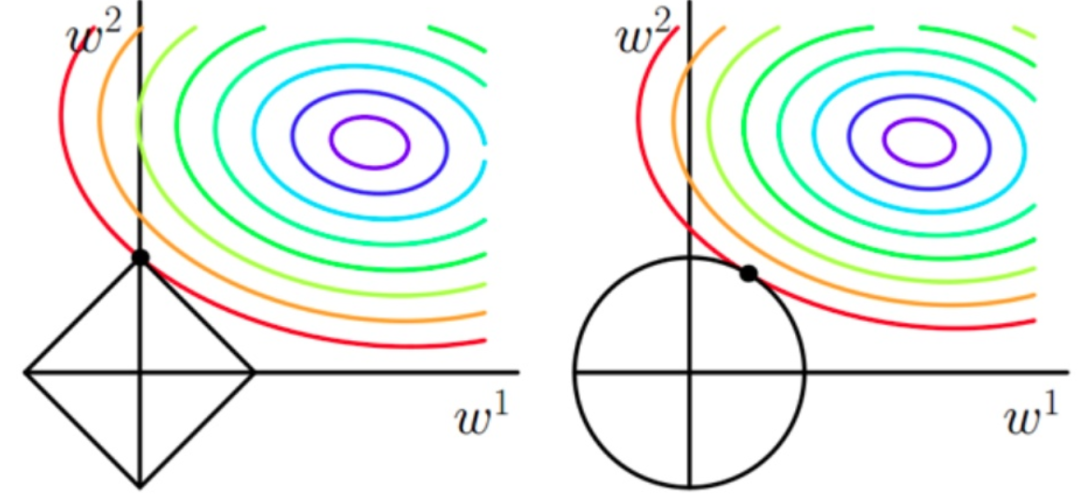

Как видно на изображении, форма функционала l1 регуляризатора будет способствовать занулению некоторых признаков (например на каритке занулем признак w1). Признаки не будут зануляться только, если точка касания функционалов на ребре представленного ромба, однако в многомерном пространстве на практике признаки часто зануляются (отбираются).

[ссылка на видео ютуб с супер понятным объяснением](https://youtu.be/vACmNV1xPDA)